# Compare All the Algorithms on the Landmine Dataset

First of all, the required packages need to be loaded. Note that "import sys" and "sys.path.append("../") are not required when writing .py codes.

In [1]:
import sys
sys.path.append("../") # go to parent dir

from PyXAB.algos import *

from PyXAB.partition.BinaryPartition import BinaryPartition
from PyXAB.utils.plot import compare_regret, compare_regret_withsd
from PyXAB.landmine.landmine_obj import obj_func_landmine
import numpy as np
import pickle


Define the training function as follows

In [2]:

def main(algo_list, target, domain, partition, rounds=1000):


    algo_dictionary = {'T-HOO': HOO.T_HOO(rounds=rounds, rho=0.5, domain=domain, partition=partition),
                       'HCT': HCT.HCT(domain=domain, rho=0.5,partition=partition),
                       'VHCT': VHCT.VHCT(domain=domain, rho=0.5, partition=partition),
                       'POO': POO.POO(domain=domain, partition=partition, algo=HOO.T_HOO),
                       'PCT': PCT.PCT(domain=domain, partition=partition)}

    results_dictionary = {}
    for name in algo_list:
        print(name, ": training")
        algo = algo_dictionary[name]
        regret_list = []
        regret = 0
        for t in range(1, rounds + 1):
            point = algo.pull(t)
            reward = target.f(point)
            algo.receive_reward(t, reward)
            inst_regret = target.fmax - reward
            regret += inst_regret
            regret_list.append(regret)

        results_dictionary[name] = np.array(regret_list)

    return results_dictionary[name]



Load the dataset, split the dataset into the training set and the testing set. Then define the objective function using the dataset.

In [3]:

landmine_data = pickle.load(open("../PyXAB/landmine/landmine_formated_data.pkl", "rb"))
all_X_train, all_Y_train, all_X_test, all_Y_test = landmine_data["all_X_train"], landmine_data["all_Y_train"], \
                                                       landmine_data["all_X_test"], landmine_data["all_Y_test"]

X_train = all_X_train[0]
Y_train = np.squeeze(all_Y_train[0])
X_test = all_X_test[0]
Y_test = np.squeeze(all_Y_test[0])

target = obj_func_landmine(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Define the parameter domain, the partition chosen, the number of rounds, and the number of trial runs

In [4]:
domain = [[1e-4, 10.0], [1e-2, 10.0]]
partition = BinaryPartition
rounds = 500
trials = 5

Run all the algorithms and record the cumulative regret of each algorithm

In [5]:

regret_array_HOO = np.array([main(['T-HOO'], target, domain, partition,rounds) for _ in range(trials)])
regret_array_HCT = np.array([main(['HCT'], target, domain, partition, rounds) for _ in range(trials)])
regret_array_VHCT = np.array([main(['VHCT'], target, domain, partition, rounds) for _ in range(trials)])
regret_array_POO = np.array([main(['POO'], target, domain, partition, rounds) for _ in range(trials)])
regret_array_PCT = np.array([main(['PCT'], target, domain, partition, rounds) for _ in range(trials)])



T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
T-HOO : training
HCT : training
HCT : training
HCT : training
HCT : training
HCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
VHCT : training
POO : training
POO : training
POO : training
POO : training
POO : training
PCT : training
PCT : training
PCT : training
PCT : training
PCT : training


Plot the cumulative regret of VHCT with error bars

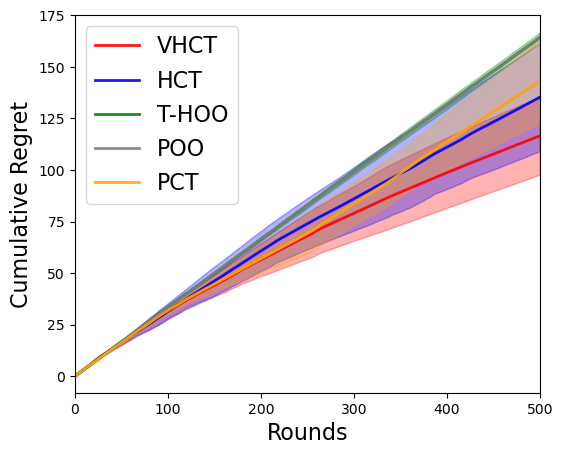

In [6]:

regret_dic = {"regret": [regret_array_VHCT, regret_array_HCT, regret_array_HOO, regret_array_POO, regret_array_PCT],
              "labels": ["VHCT", "HCT", 'T-HOO',  'POO', 'PCT'],
              "colors": ['red', 'blue', 'green', 'grey', 'orange']}

compare_regret_withsd(regret_dic, x_range=(0, rounds))